In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [2]:
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [9]:
import torch 
from matplotlib import pyplot as plt
import numpy as np 
import cv2

In [10]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\Dell/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-10 Python-3.12.2 torch-2.2.1+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [11]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [12]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [13]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 3270.8ms pre-process, 354.8ms inference, 8.3ms NMS per image at shape (1, 3, 384, 640)


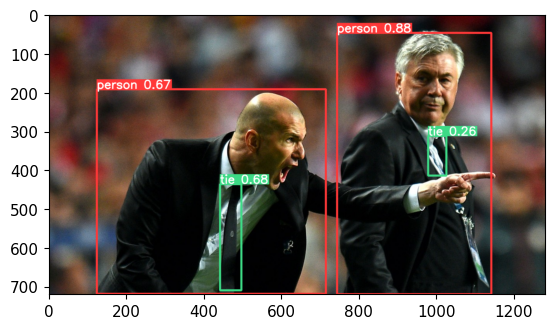

In [14]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [15]:
results.xyxy

[tensor([[7.43290e+02, 4.83437e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]])]

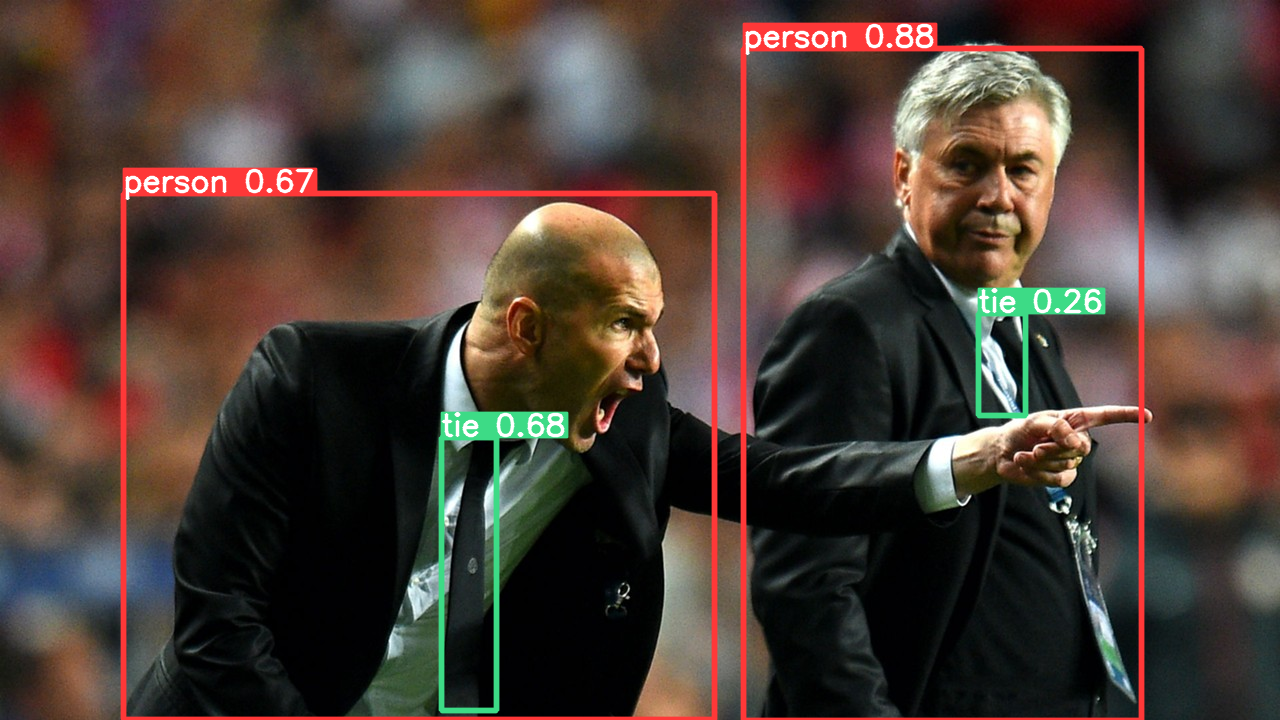

In [16]:
results.show()

In [17]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [18]:
np.array(results.render()).shape

(1, 720, 1280, 3)

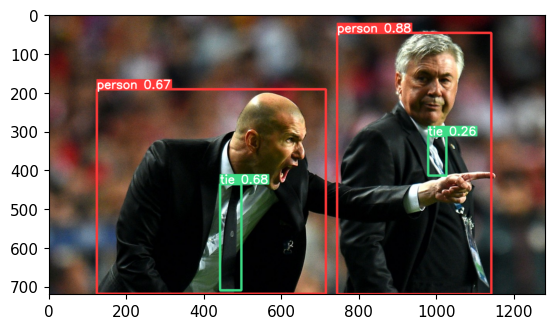

In [19]:
plt.imshow(np.squeeze(results.render()))

In [20]:
img = 'https://thumbs.dreamstime.com/b/cars-traffic-boulevard-bucharest-romania-february-seen-above-141035228.jpg'

In [21]:
results = model(img)
results.print()

image 1/1: 534x800 15 cars
Speed: 1655.6ms pre-process, 403.6ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


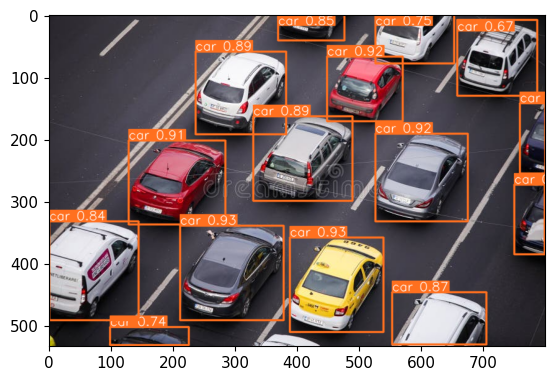

In [22]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

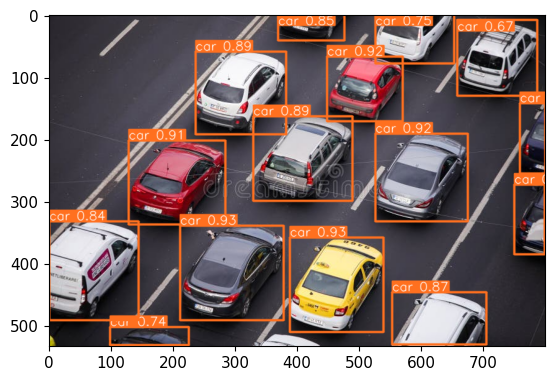

In [22]:
plt.imshow(np.squeeze(results.render()))

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [24]:
import uuid #unique identifier 
import os 
import time

In [25]:
IMAGES_PATH = os.path.join('data','images')
labels = ['Awake', 'Drowsy']
number_imgs = 20

In [26]:
cap = cv2.VideoCapture(0)
#loop through labels
for label in labels:
    print('Collecting images for {}'.format(label)) 
    time.sleep(5)

    #loop through image range 
    for img_num in range(number_imgs):
        print('Collecting images for{}, image number {}'.format(label,  img_num))

        ret, frame = cap.read()
        
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
        

In [26]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\Awake.8e30daa6-e51f-11ee-953b-dc4628c7989e.jpg


In [25]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\Awake.67d527a9-e51f-11ee-9966-dc4628c7989e.jpg
data\images\Awake.67d527aa-e51f-11ee-b283-dc4628c7989e.jpg
data\images\Awake.67d527ab-e51f-11ee-8c7a-dc4628c7989e.jpg
data\images\Awake.67d527ac-e51f-11ee-9993-dc4628c7989e.jpg
data\images\Awake.67d527ad-e51f-11ee-901b-dc4628c7989e.jpg
data\images\Awake.67d527ae-e51f-11ee-b302-dc4628c7989e.jpg
data\images\Awake.67d527af-e51f-11ee-9dc2-dc4628c7989e.jpg
data\images\Awake.67d527b0-e51f-11ee-b0be-dc4628c7989e.jpg
data\images\Awake.67d527b1-e51f-11ee-8fd6-dc4628c7989e.jpg
data\images\Awake.67d527b2-e51f-11ee-bb27-dc4628c7989e.jpg
data\images\Awake.67d527b3-e51f-11ee-ad89-dc4628c7989e.jpg
data\images\Awake.67d527b4-e51f-11ee-b06e-dc4628c7989e.jpg
data\images\Awake.67d527b5-e51f-11ee-9869-dc4628c7989e.jpg
data\images\Awake.67d527b6-e51f-11ee-b1d8-dc4628c7989e.jpg
data\images\Awake.67d527b7-e51f-11ee-a15b-dc4628c7989e.jpg
data\images\Awake.67d527b8-e51f-11ee-bd77-dc4628c7989e.jpg
data\images\Awake.67d527b9-e51f-11ee-af85-dc4628c7989e.j

In [27]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [28]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.8 MB 1.3 MB/s eta 0:00:06
   ---------------------------------------- 0.1/6.8 MB 787.7 kB/s eta 0:00:09
   - -------------------------------------- 0.3/6.8 MB 2.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/6.8 MB 4.1 MB/s eta 0:00:02
   ----- ---------------------------------- 0.9/6.8 MB 4.6 MB/s eta 0:00:02
   ------- -------------------------------- 1.3/6.8 MB 5.3 MB/s eta 0:00:02
   --------- ------------------------------ 1.6/6.8 MB 5.8 MB/s eta 0:00:01
   ----------- ---------------------------- 2.0/6.8 MB 5.7 MB/s eta 0:00:01
   ------------- -------------------------- 2.3/6.8 MB 6.0 MB/s eta 0:00:01
   --------------- ------------------------ 2.6/6.8 MB 6.2 MB/s eta 0:00:01
   ---------------- ----------------------- 2.9/6.8 MB 6.2 MB/s eta 0:00:01
   ------------------- -------------------- 3.3/6.8 MB 6.6 MB/s eta 0:00:01
   --------------

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2